In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid", palette = "pastel") 
import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('cars_processed.csv')

In [31]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model,is_luxury,car_age,is_old,km_per_year,is_high_km,price_per_km,price_per_year
0,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Diesel,Individual,Manual,First Owner,Hyundai,Verna 1.6 SX,0,13.0,1,7692.307692,1,6.000000,46153.846154
1,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petrol,Individual,Manual,First Owner,Datsun,RediGO T Option,0,8.0,0,5750.000000,0,5.434783,31250.000000
2,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesel,Individual,Manual,Second Owner,Honda,Amaze VX i-DTEC,0,11.0,1,12818.181818,1,3.191489,40909.090909
3,Maruti Alto LX BSIII,2007.0,140000.0,60000.0,Petrol,Individual,Manual,First Owner,Maruti,Alto LX BSIII,0,18.0,1,3333.333333,0,2.333333,7777.777778
4,Maruti Swift Dzire VDI,2016.0,550000.0,60000.0,Petrol,Individual,Manual,First Owner,Maruti,Swift Dzire VDI,0,9.0,0,6666.666667,0,9.166667,61111.111111


In [32]:
data.duplicated().sum()

np.int64(0)

In [33]:
data.drop_duplicates(inplace = True)

In [34]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model', 'is_luxury', 'car_age',
       'is_old', 'km_per_year', 'is_high_km', 'price_per_km',
       'price_per_year'],
      dtype='object')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3345 non-null   object 
 1   year            3345 non-null   float64
 2   selling_price   3345 non-null   float64
 3   km_driven       3345 non-null   float64
 4   fuel            3345 non-null   object 
 5   seller_type     3345 non-null   object 
 6   transmission    3345 non-null   object 
 7   owner           3345 non-null   object 
 8   brand           3345 non-null   object 
 9   model           3345 non-null   object 
 10  is_luxury       3345 non-null   int64  
 11  car_age         3345 non-null   float64
 12  is_old          3345 non-null   int64  
 13  km_per_year     3345 non-null   float64
 14  is_high_km      3345 non-null   int64  
 15  price_per_km    3345 non-null   float64
 16  price_per_year  3345 non-null   float64
dtypes: float64(7), int64(3), object(7

---

## **Exploratory Data Analysis (EDA)**

## UNIVARIATE ANALYSIS — NUMERICAL FEATURES

## Histogram Distributions of Car Dataset Features

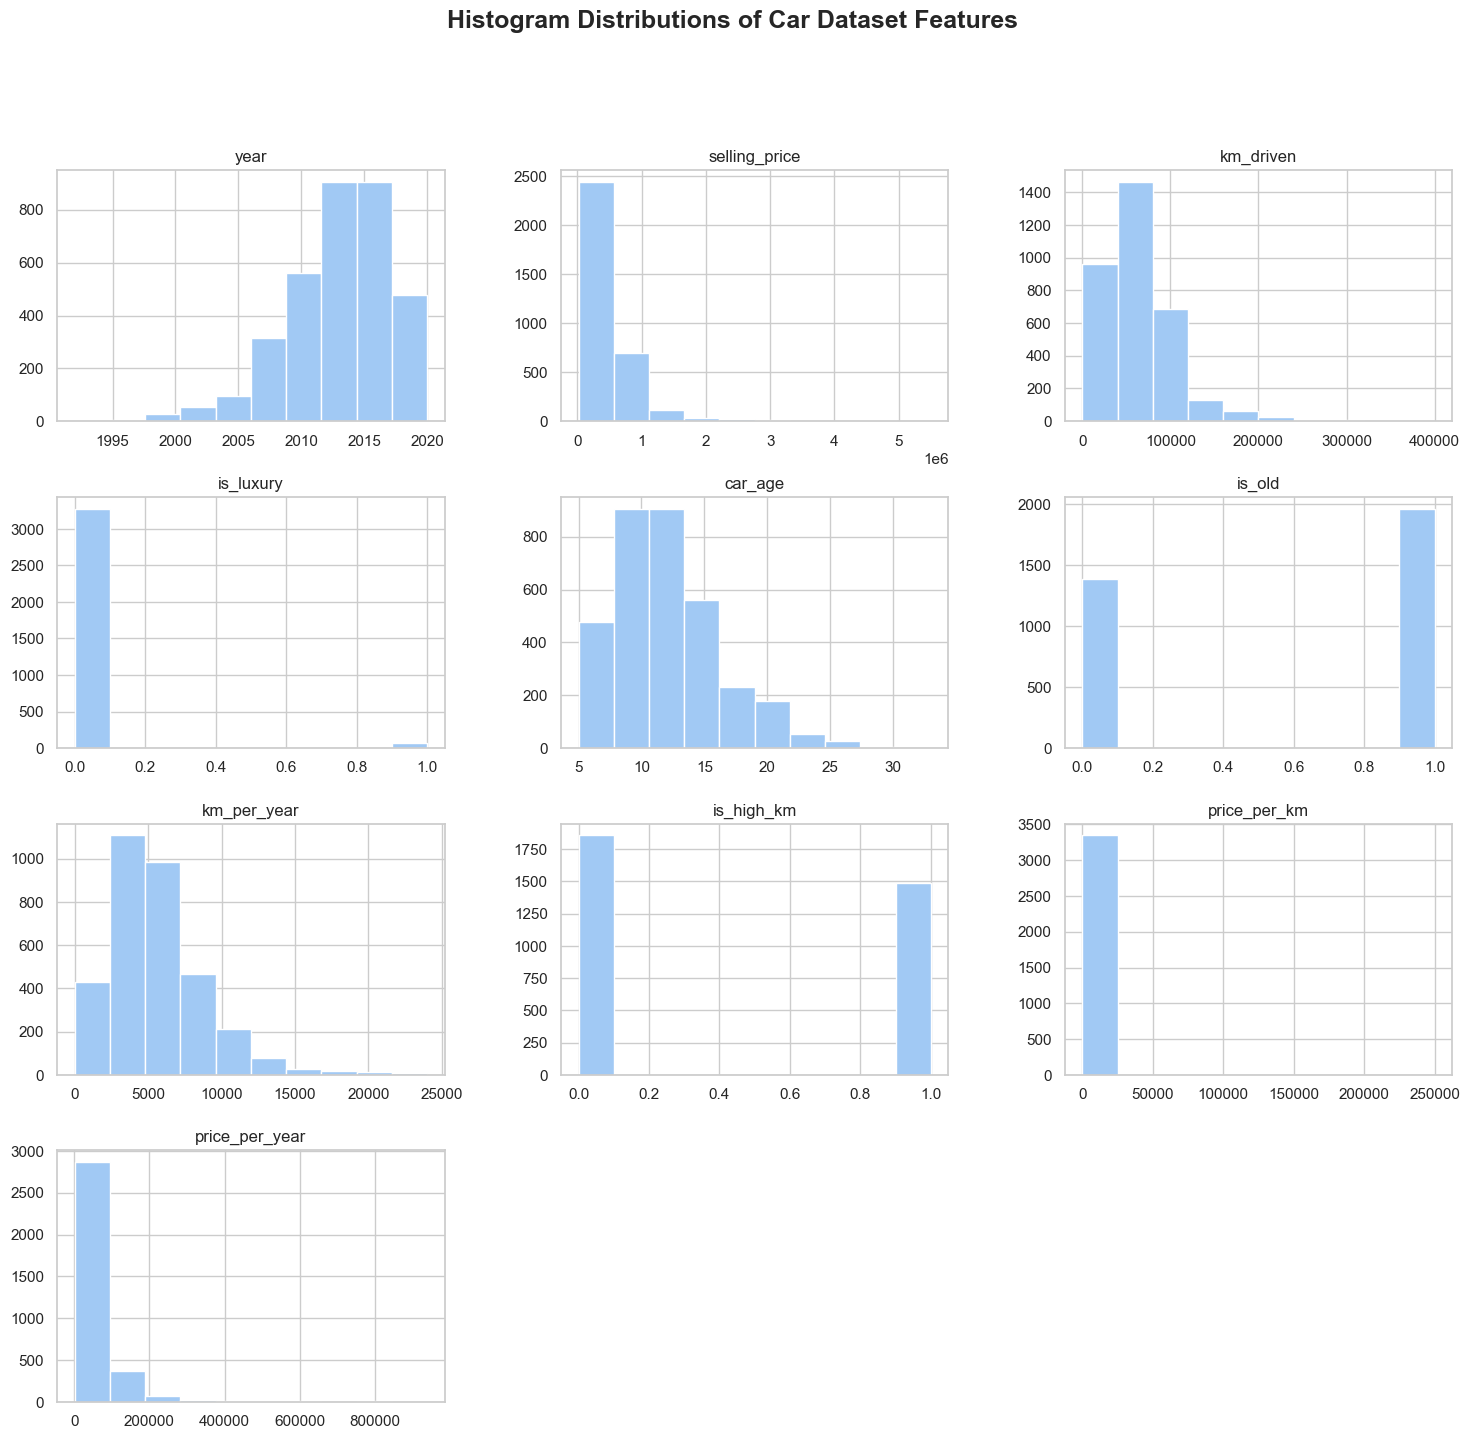

In [36]:
data.hist(figsize = (18, 16))
plt.suptitle('Histogram Distributions of Car Dataset Features', fontsize=18, fontweight='bold')
plt.show()

### Explanation of the Distributions (Histogram Interpretations)

Below is a simple interpretation of what each plot tells us about the data.

### 1. `year`
- The distribution is **right-skewed** toward newer years (2010–2020).
- This means most cars in the dataset are relatively new.
- Very few old cars (before 2005).

### 2. `selling_price`
- The distribution is **extremely right-skewed**.
- Most cars have low to moderate prices.
- A small number are very expensive, creating a long tail.

### 3. `km_driven`
- The distribution is **right-skewed**.
- Most cars have low to medium mileage.
- Very few cars have extremely high mileage (over 300,000 km).

### 4. `is_luxury`
- Mostly **0s** (non-luxury cars).
- A very small number of **1s** (luxury cars).
- Dataset is dominated by normal brands.

### 5. `car_age`
- Most cars cluster around **8–15 years** old.
- Fewer very old cars (20+ years).
- Slight right skew (more older cars than very new ones).

### 6. `is_old`
- **Bimodal distribution** with two bars:
  - Many **0s** (not old)
  - Slightly more **1s** (old cars)
- Indicates the dataset has a good mix, leaning slightly toward older cars.

### 7. `km_per_year`
- Strong **right skew**.
- Most cars have low yearly mileage → lightly used.
- A few cars have extremely high km/year → outliers.

### 8. `is_high_km`
- Two clear bars:
  - Many **0s** (normal mileage)
  - Many **1s** (high mileage)
- Almost balanced → your threshold splits the data evenly.

### 9. `price_per_year`
- **Very right-skewed**.
- Most cars have a low price/year value.
- A few cars have extremely high values (often new or luxury cars).

### 10. `price_per_km`
- **Extremely right-skewed**.
- Most values are near zero → normal-priced cars.
- A few points are extremely high → overpriced or very low-mileage cars.

## UNIVARIATE ANALYSIS — CATEGORICAL FEATURES

## Fuel Type

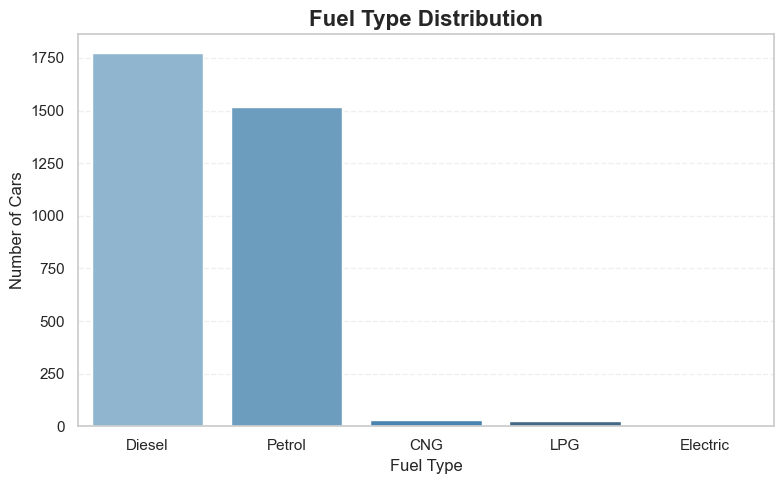

In [37]:
plt.figure(figsize=(8, 5))

sns.countplot(
    data=data,
    palette = 'Blues_d',
    x="fuel",
)

plt.title("Fuel Type Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

## Owner Type

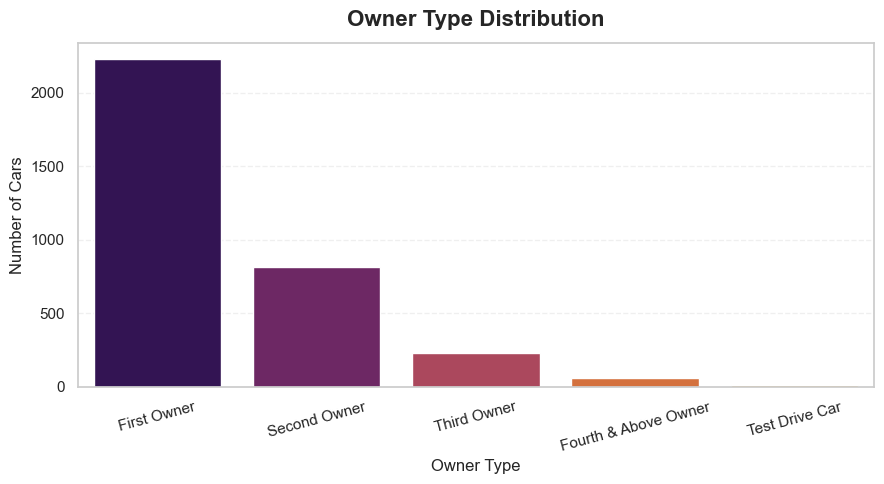

In [38]:
plt.figure(figsize=(9, 5))

# Sort owner categories by frequency
order = data['owner'].value_counts().index

sns.countplot(
    data=data,
    x="owner",
    order=order,         
    palette="inferno"
)

plt.title("Owner Type Distribution", fontsize=16, fontweight="bold", pad=12)
plt.xlabel("Owner Type", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

The used-car market in this dataset is dominated by vehicles with only one previous owner. Multi-owner cars are much less common and less preferred.

In [39]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model', 'is_luxury', 'car_age',
       'is_old', 'km_per_year', 'is_high_km', 'price_per_km',
       'price_per_year'],
      dtype='object')

## BIVARIATE — NUMERICAL vs NUMERICAL

## KM Driven vs Selling Price

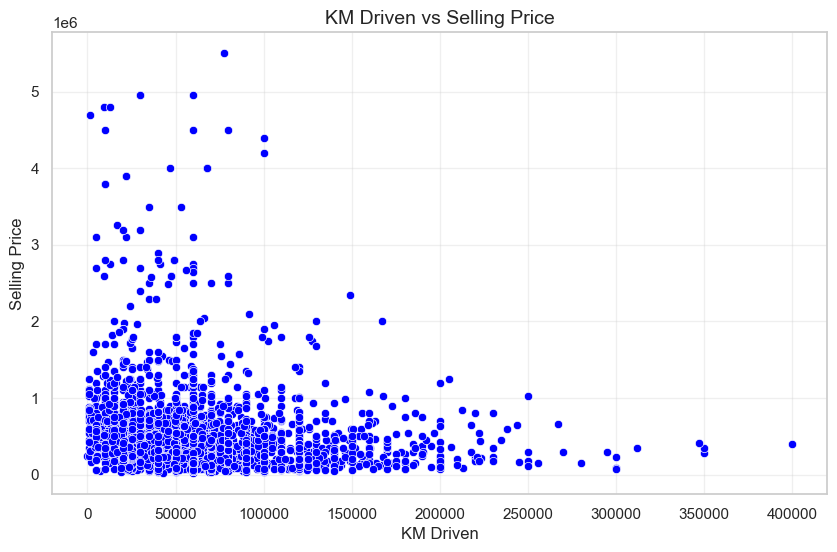

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='km_driven', y='selling_price', color = "blue")
plt.title("KM Driven vs Selling Price", fontsize=14)
plt.xlabel("KM Driven")
plt.ylabel("Selling Price")
plt.grid(alpha=0.3)
plt.show()

## Impact of Car Age on Selling Price

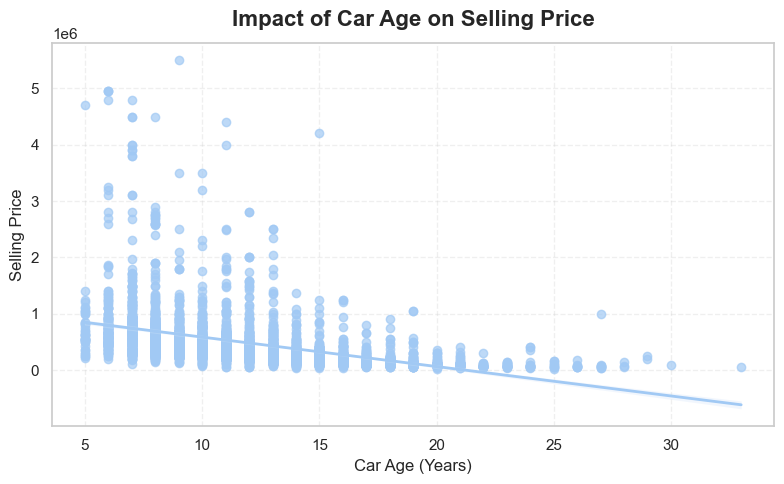

In [41]:
plt.figure(figsize=(8, 5))

sns.regplot(
    data=data,
    x='car_age',
    y='selling_price',
    scatter_kws={'alpha': 0.7},
    line_kws={'linewidth': 2}
)

plt.title("Impact of Car Age on Selling Price", fontsize=16, fontweight="bold", pad=12)
plt.xlabel("Car Age (Years)", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)

plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## BIVARIATE — NUMERICAL vs CATEGORICAL

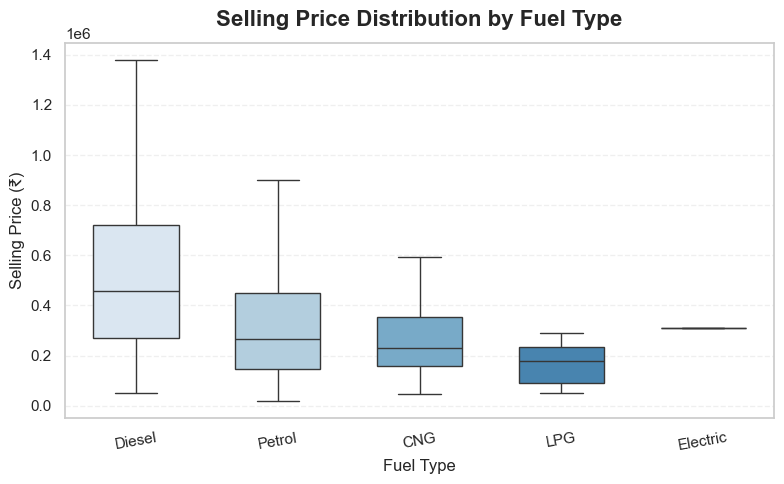

In [42]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=data,
    x='fuel',
    y='selling_price',
    palette='Blues',
    width=0.6,
    showfliers=False  # hides extreme outliers for cleaner view
)

plt.title("Selling Price Distribution by Fuel Type", fontsize=16, fontweight='bold', pad=12)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Selling Price (₹)", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=10)  # slight tilt to prevent label collisions
plt.tight_layout()
plt.show()

## Average Selling Price by Transmission Type

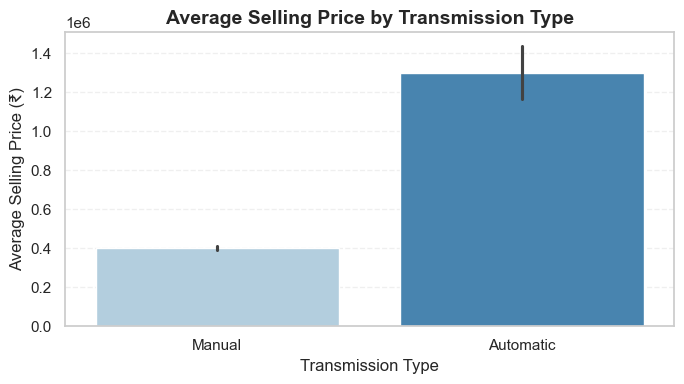

In [43]:
plt.figure(figsize=(7,4))

sns.barplot(
    data=data,
    x='transmission',
    y='selling_price',
    palette='Blues'
)

plt.title("Average Selling Price by Transmission Type", fontsize=14, fontweight='bold')
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Average Selling Price (₹)", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Average Selling Price by Owner Type

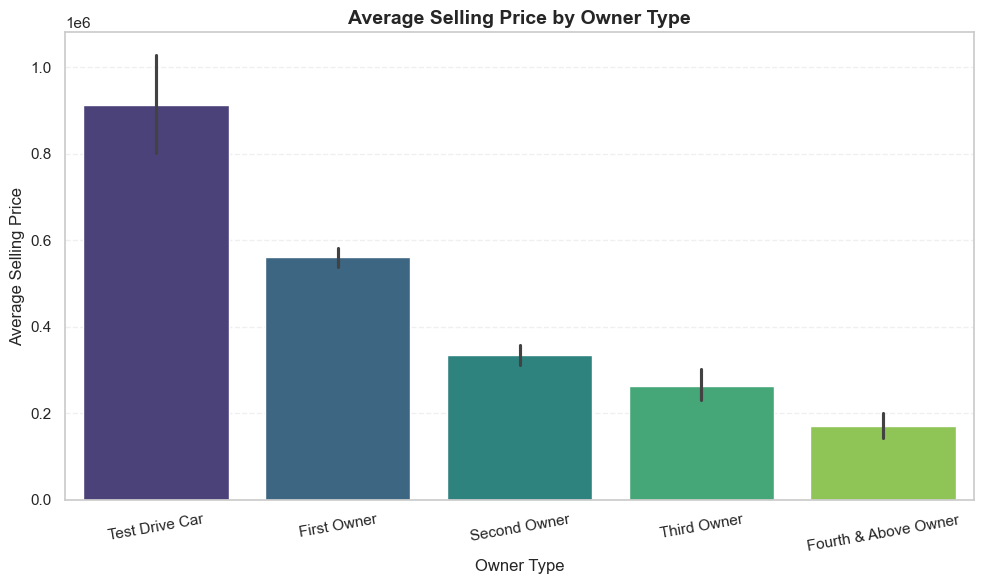

In [44]:
plt.figure(figsize=(10,6))

# Determine order based on mean selling price
order = (
    data.groupby('owner')['selling_price']
    .mean()
    .sort_values(ascending=False)
    .index
)

sns.barplot(
    data=data,
    x='owner',
    y='selling_price',
    estimator='mean',
    palette='viridis',
    order=order
)

plt.title("Average Selling Price by Owner Type", fontsize=14, fontweight='bold')
plt.xlabel("Owner Type")
plt.ylabel("Average Selling Price")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

In [45]:
len(data['brand'].unique())

29

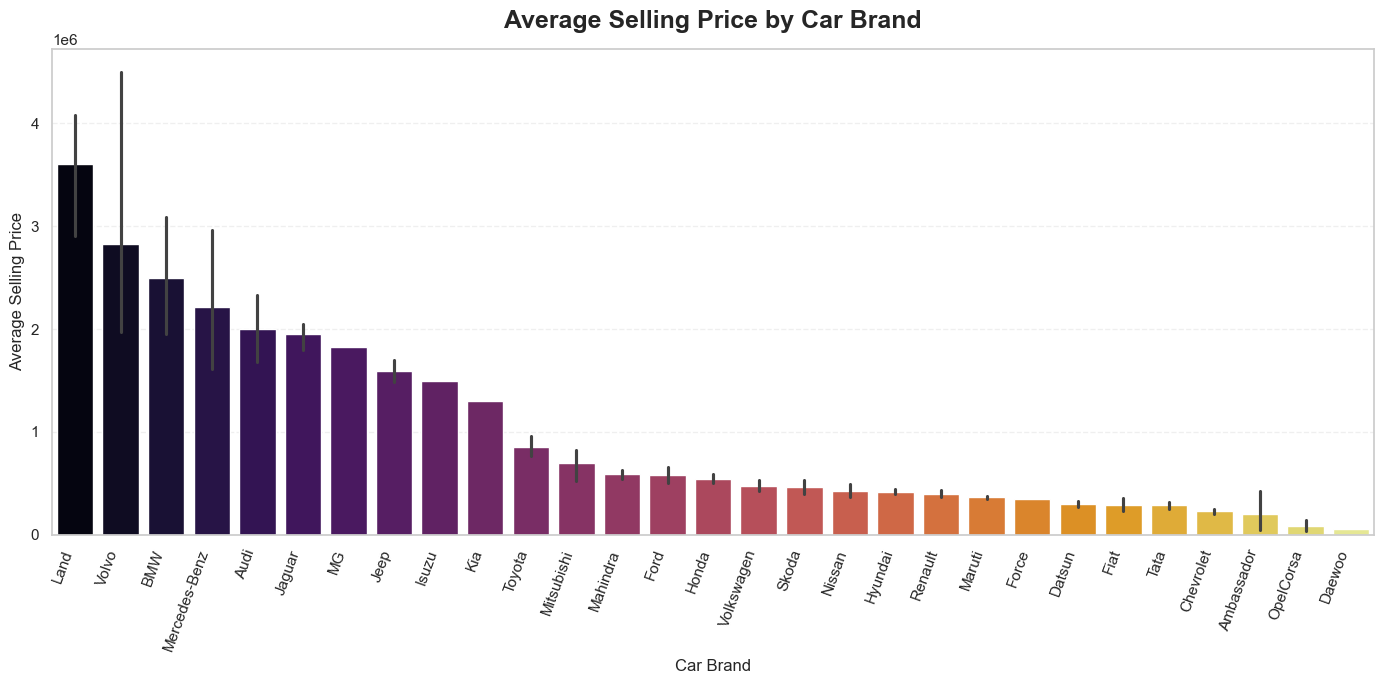

In [46]:
plt.figure(figsize=(14, 7))

# Determine order based on mean selling price
order = (
    data.groupby('brand')['selling_price']
    .mean()
    .sort_values(ascending=False)
    .index
)

sns.barplot(
    data=data,
    x='brand',
    y='selling_price',
    estimator='mean',
    palette='inferno',
    order=order,
)

plt.title("Average Selling Price by Car Brand", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Car Brand", fontsize=12)
plt.ylabel("Average Selling Price", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.xticks(rotation=70, ha='right')

plt.tight_layout()
plt.show()

## BIVARIATE — CATEGORICAL vs CATEGORICAL

## Fuel Type vs Owner Type

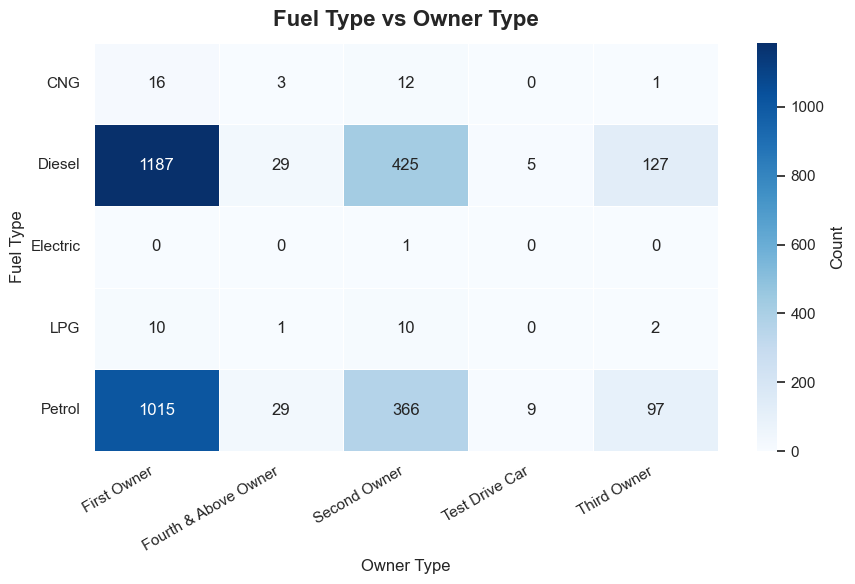

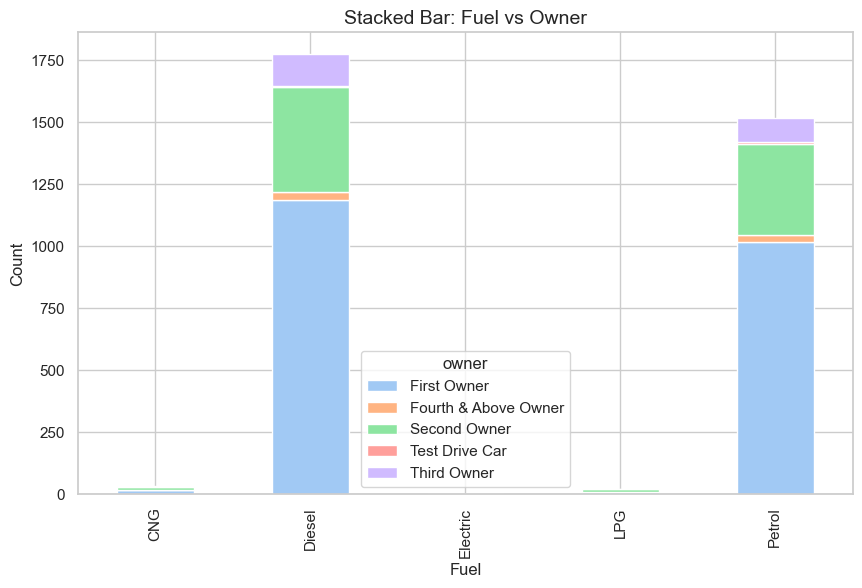

In [47]:
ct = pd.crosstab(data['fuel'], data['owner'])

plt.figure(figsize=(9,6))
sns.heatmap(
    ct,
    annot=True,
    fmt="d",
    cmap="Blues",
    linewidths=0.5,        # gridlines between cells
    linecolor='white',     # cleaner separation
    cbar_kws={'label': 'Count'}  # colorbar label
)

plt.title("Fuel Type vs Owner Type", fontsize=16, fontweight='bold', pad=12)
plt.xlabel("Owner Type", fontsize=12)
plt.ylabel("Fuel Type", fontsize=12)

plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

ct.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Stacked Bar: Fuel vs Owner", fontsize=14)
plt.xlabel("Fuel")
plt.ylabel("Count")
plt.show()

## MULTIVARIATE ANALYSIS

## Correlation Matrix of Numerical Features

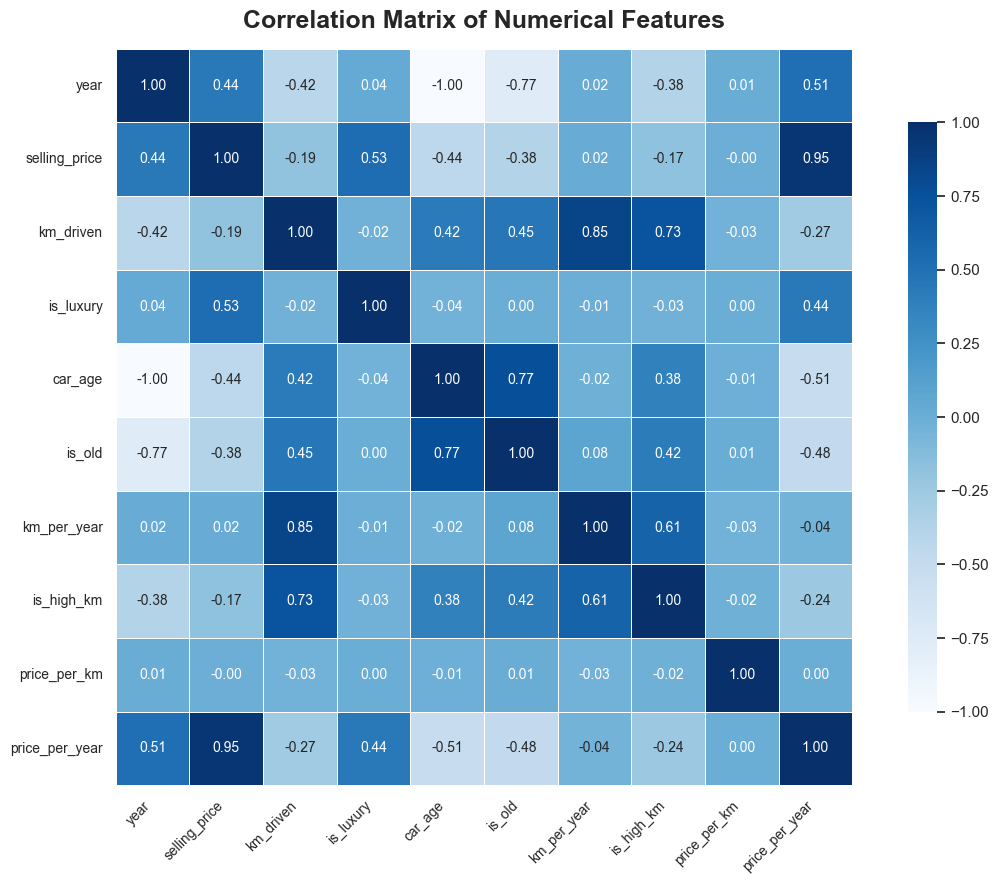

In [48]:
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

plt.title("Correlation Matrix of Numerical Features", fontsize=18, fontweight='bold', pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

The correlation matrix illustrates the linear relationship between numerical features in the dataset. Correlation values range between -1 and +1:

- **+1** indicates a perfect positive relationship
- **-1** indicates a perfect negative relationship
- **0** indicates no linear relationship

### Key Observations

**Car Age, Year, and Price**
- `year` and `car_age` have a correlation of **-1.00**, showing they are exact inverses.
- `car_age` and `selling_price` have a correlation of **-0.43**, indicating that older cars tend to sell for less.
- `year` and `selling_price` show a correlation of **0.43**, meaning newer cars generally have higher prices.

**Price-Related Features**
- `selling_price` and `price_per_year` show a very strong correlation of **0.96**, meaning cars priced higher per year of usage also have higher selling prices.
- `selling_price` and `is_luxury` have a correlation of **0.51**, indicating luxury cars typically sell at higher prices.

**Mileage Relationships**
- `km_driven` and `km_per_year` have a correlation of **0.86**, showing cars driven more overall tend to accumulate more kilometers annually.
- `km_driven` and `is_old` have a correlation of **0.42**, reflecting that older vehicles usually have more mileage.
- `km_driven` and `selling_price` correlate at **-0.18**, suggesting higher mileage slightly lowers price but not strongly.

**High Mileage Indicators**
- `km_driven` and `is_high_km` correlate at **0.69**, confirming the binary flag correctly marks high-mileage cars.
- `is_high_km` and `km_per_year` correlate at **0.59**, indicating that vehicles driven more each year tend to accumulate high total mileage.

**Weak or Minimal Correlations**
These features do not significantly influence one another:
- `is_luxury` vs `km_driven`: **-0.02**
- `price_per_km` vs `selling_price`: **0.00**
- `is_high_km` vs `price_per_km`: **-0.02**

### Summary

- Selling price is influenced by age and luxury status.
- Mileage-related features correlate with each other but not strongly with price.
- `year` and `car_age` are redundant and should not be used together in modeling.
- The dataset contains informative and non-redundant features suitable for predictive analysis.

## Pairplot of Numerical Features — Explanation

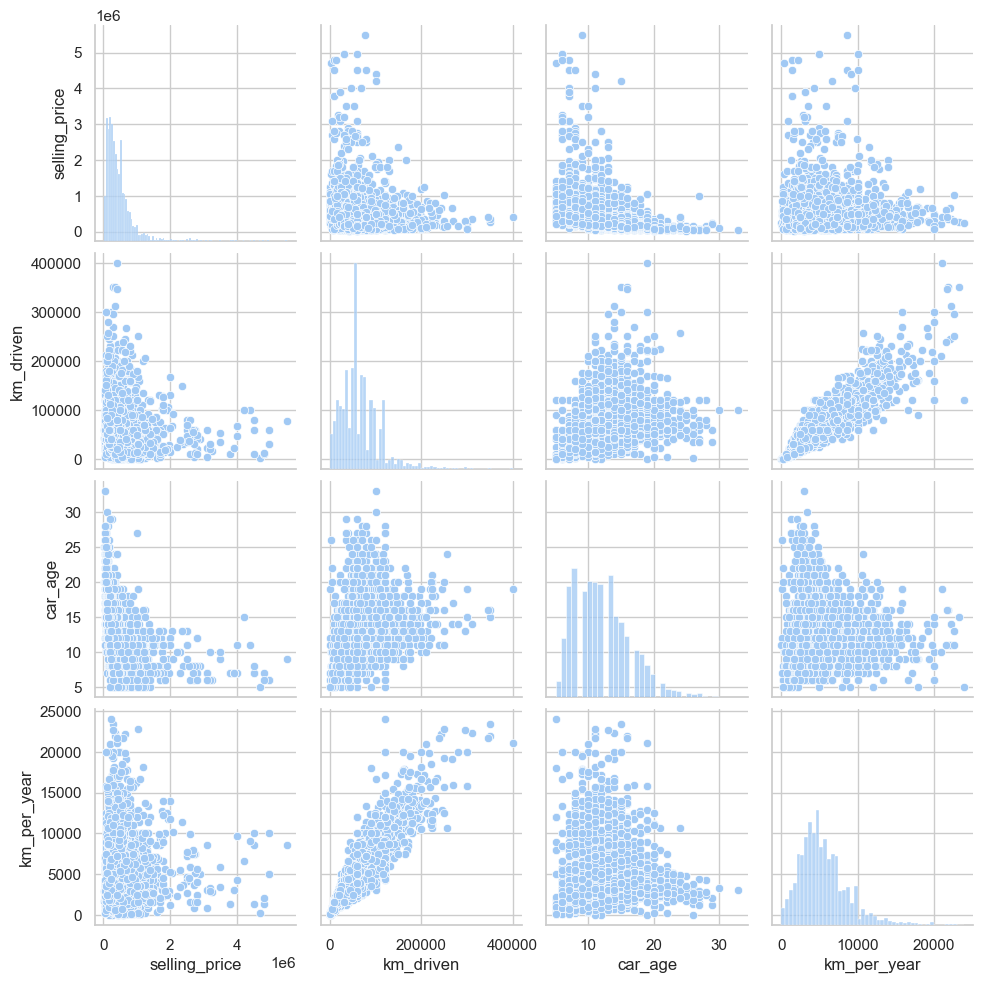

In [49]:
plt.Figure(figsize = (26, 28))
sns.pairplot(data[['selling_price','km_driven','car_age','km_per_year']])
plt.show()

This pairplot visualizes the relationships between key numerical variables in the dataset: `selling_price`, `km_driven`, `car_age`, and `km_per_year`. Each cell shows either a scatter plot (correlation between two variables) or a histogram (distribution of a single variable).

### Key Observations

### Selling Price
- The histogram for `selling_price` is heavily right-skewed, indicating that most cars are priced on the lower end, with a small number of very expensive vehicles.
- `selling_price` vs `km_driven` shows a downward trend: cars with higher mileage generally sell for less.
- `selling_price` vs `car_age` also shows a negative pattern: older cars tend to have lower prices.
- `selling_price` vs `km_per_year` shows no strong visible trend, suggesting yearly usage does not directly determine price.

### KM Driven
- `km_driven` has a right-skewed distribution, meaning most cars have moderate mileage, with fewer extremely high-mileage cars.
- `km_driven` vs `car_age` shows a clear upward pattern: older cars tend to have accumulated more kilometers.
- `km_driven` vs `km_per_year` shows a positive relationship: cars driven more each year logically end up with higher total mileage.

### Car Age
- The histogram of `car_age` shows most cars lie between 5–20 years old.
- `car_age` vs `km_per_year` shows no consistent pattern, indicating mileage per year varies widely regardless of age.

### KM per Year
- `km_per_year` is concentrated toward lower values, indicating most cars are driven relatively few kilometers annually.
- Scatter plots involving `km_per_year` generally show limited direct relationships with price or age, reinforcing that yearly mileage alone does not fully determine resale value.

### Summary

- Selling price decreases as car age and total kilometers increase.
- Older cars tend to accumulate more mileage.
- Annual mileage varies widely and does not strongly correlate with selling price.
- The pairplot highlights expected depreciation and usage trends, confirming logical relationships within the dataset.

## Selling Price by Fuel Type (Faceted by Owner) — Explanation

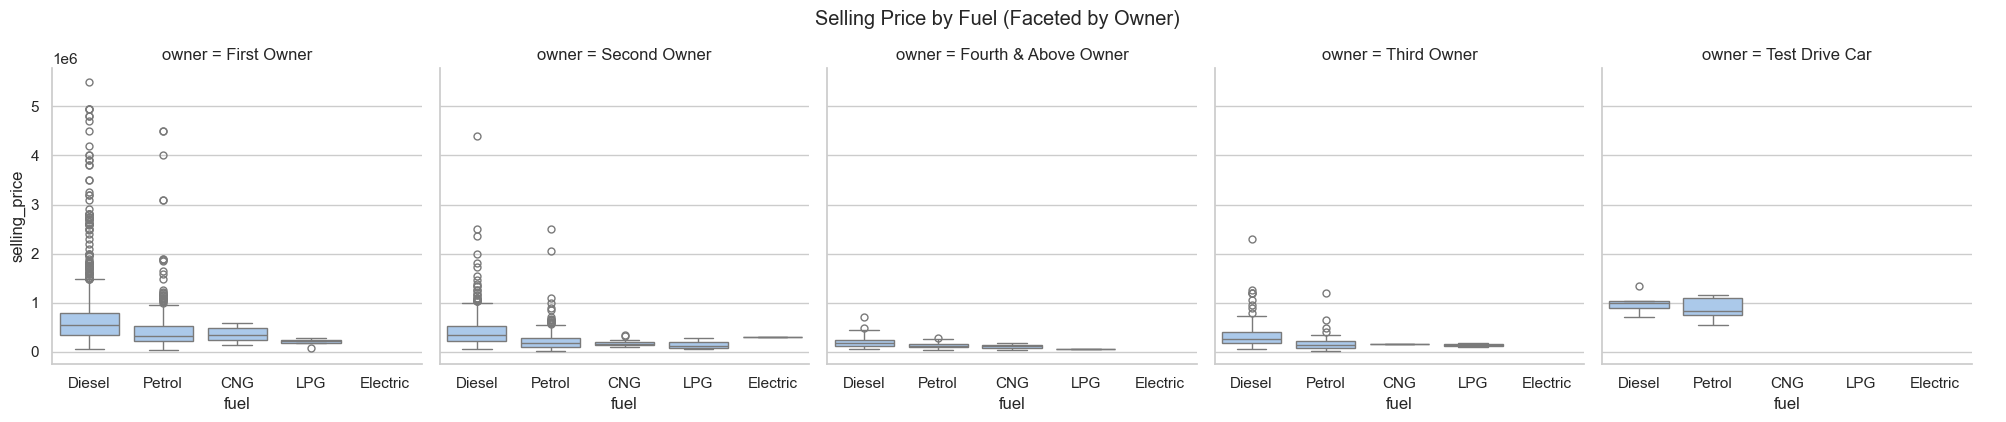

In [50]:
g = sns.catplot(
    data=data,
    x="fuel",
    y="selling_price",
    col="owner",
    kind="box",
    height=4
)
g.fig.suptitle("Selling Price by Fuel (Faceted by Owner)", y=1.05)
plt.show()

- Fuel type influences selling price, but ownership history amplifies the effect.
- **Diesel cars consistently command higher prices**, especially when the car has had fewer owners.
- **Price declines with each additional owner**, indicating strong depreciation tied to ownership count.
- Alternative fuel vehicles (CNG, LPG, Electric) are less common and generally less expensive, regardless of ownership history.

This plot reinforces that both **fuel type** and **ownership status** significantly impact car resale value.

## Price vs KM vs Age

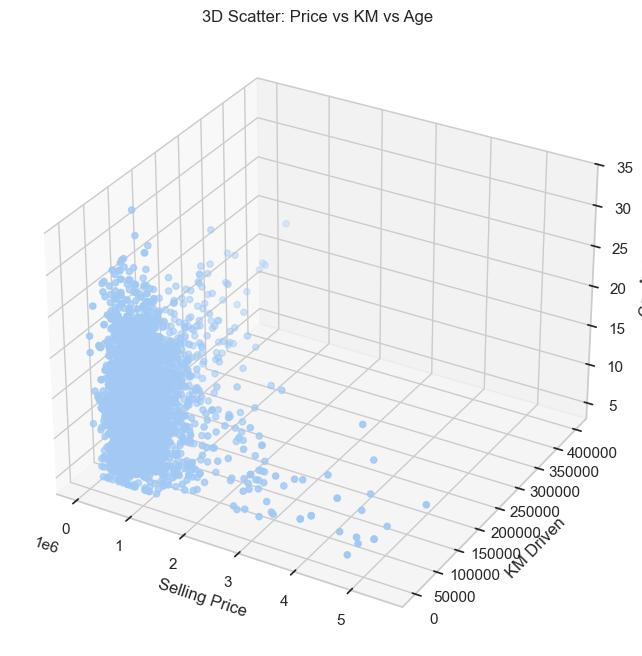

In [51]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['selling_price'], data['km_driven'], data['car_age'])

ax.set_xlabel("Selling Price")
ax.set_ylabel("KM Driven")
ax.set_zlabel("Car Age")

plt.title("3D Scatter: Price vs KM vs Age")
plt.show()

In [52]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand', 'model', 'is_luxury', 'car_age',
       'is_old', 'km_per_year', 'is_high_km', 'price_per_km',
       'price_per_year'],
      dtype='object')

---

## **Overall Cars KPIs Summary**

In [53]:
# 1. Basic dataset info
total_cars = data.shape[0]
unique_brands = data['brand'].nunique()
unique_models = data['model'].nunique()

print("Total Cars:", total_cars)
print("Unique Brands:", unique_brands)
print("Unique Models:", unique_models)

Total Cars: 3345
Unique Brands: 29
Unique Models: 1330


In [54]:
# 2. Price KPIs
avg_price = data['selling_price'].mean()
median_price = data['selling_price'].median()
max_price = data['selling_price'].max()
min_price = data['selling_price'].min()

print("Average Price:", avg_price)
print("Median Price:", median_price)
print("Max Price:", max_price)
print("Min Price:", min_price)

Average Price: 480165.3745889387
Median Price: 350000.0
Max Price: 5500000.0
Min Price: 20000.0


In [55]:
# 3. Age KPIs
avg_age = data['car_age'].mean()
old_car_share = data['is_old'].mean()

print("Average Car Age:", avg_age)
print("Old Car Share:", old_car_share)

Average Car Age: 11.999701046337817
Old Car Share: 0.5865470852017938


In [56]:
# 4. Mileage KPIs
avg_km = data['km_driven'].mean()
high_km_share = data['is_high_km'].mean()  # proportion of high mileage cars

print("Average KM Driven:", avg_km)
print("High KM Share:", high_km_share)

Average KM Driven: 67045.93064275038
High KM Share: 0.445440956651719
